<a href="https://colab.research.google.com/github/Remaaa17/Data_Preprocessing-ML/blob/main/Task3_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
file_path = r"/content/titanic_data.csv"
Titanic_df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame
print("Titanic DataFrame:")
Titanic_df.head(30)


Titanic DataFrame:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          713 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     887 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  887 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.2+ KB


In [ ]:
Titanic_df.shape

(889, 15)

In [ ]:
misiing_value=Titanic_df.isnull().sum()
misiing_value

survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64

> Drop unused columns

In [ ]:

Titanic_df.drop(['deck', 'alive', 'embarked', 'class', 'who', 'embark_town'], axis=1, inplace=True)

####Handling missing values

<Figure size 1500x1500 with 0 Axes>

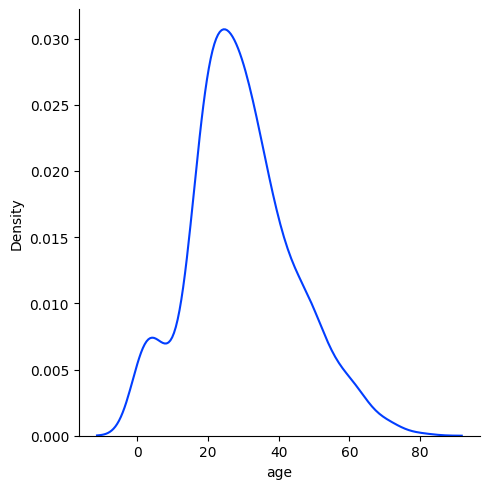

<Figure size 1500x1500 with 0 Axes>

In [ ]:
sns.set_palette("bright")
sns.displot(data=Titanic_df, x="age", kind="kde")
plt.figure(figsize=(15,15))

>Filling the missing data with the median

In [ ]:
# Handling missing values
Titanic_df['age'].fillna(Titanic_df['age'].median(), inplace=True)

>Visualizing  data after handling missing values

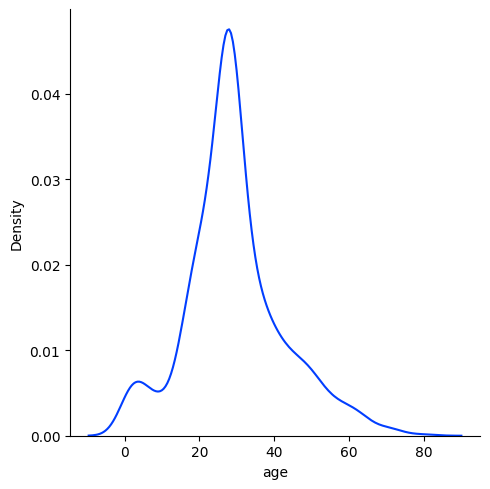

In [ ]:
sns.set_palette("bright")
sns.displot(data=Titanic_df, x="age", kind="kde")

In [ ]:
Titanic_df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
adult_male    0
alone         0
dtype: int64

In [ ]:
Titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,True,False
1,1,1,female,38.0,1,0,71.2833,False,False
2,1,3,female,26.0,0,0,7.9250,False,True
3,1,1,female,35.0,1,0,53.1000,False,False
4,0,3,male,35.0,0,0,8.0500,True,True
...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,True,True
885,1,1,female,19.0,0,0,30.0000,False,True
886,0,3,female,28.0,1,2,23.4500,False,False
887,1,1,male,26.0,0,0,30.0000,True,True


In [ ]:
scaler = StandardScaler()
Titanic_df[['age', 'fare']] = scaler.fit_transform(Titanic_df[['age', 'fare']])

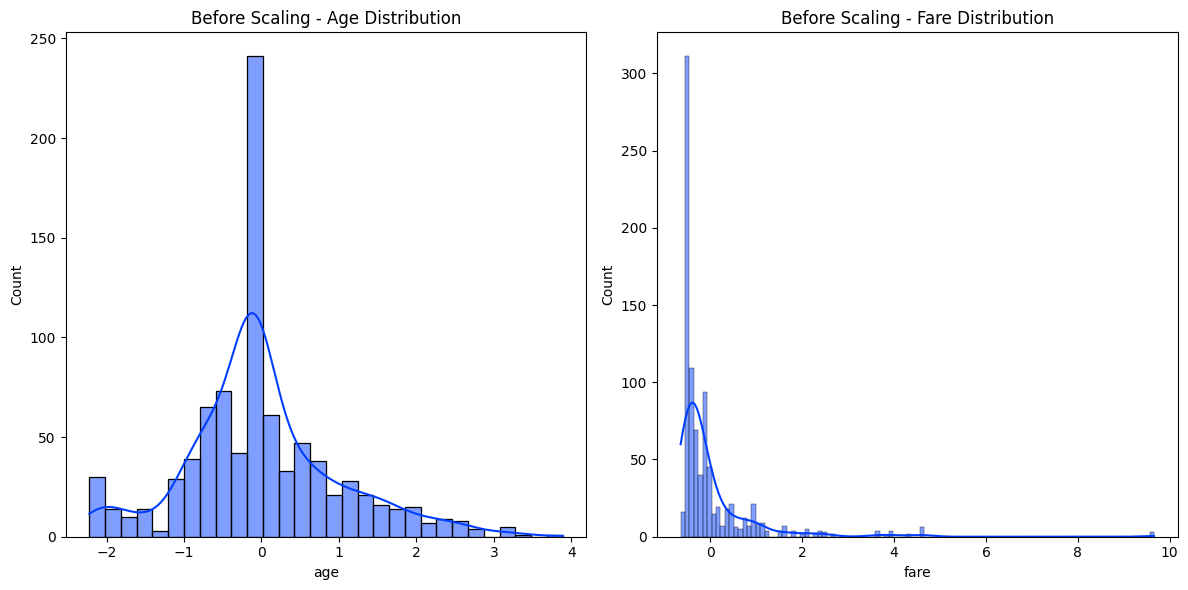

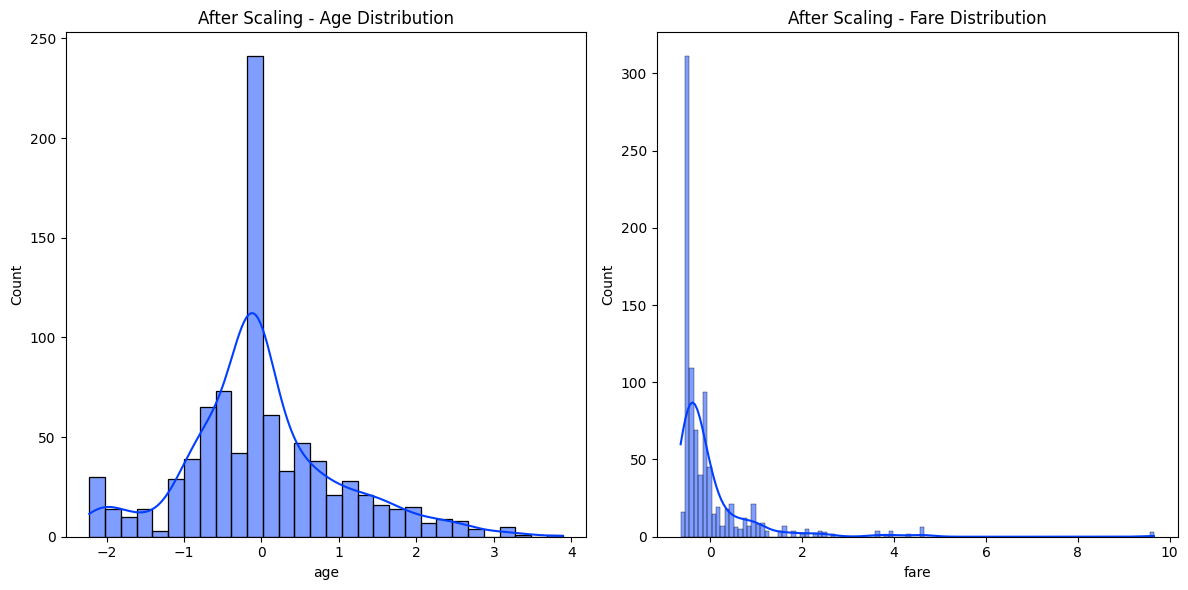

In [ ]:
# Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize 'age' and 'fare' columns before scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(Titanic_df['age'], kde=True)
plt.title('Before Scaling - Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(Titanic_df['fare'], kde=True)
plt.title('Before Scaling - Fare Distribution')

plt.tight_layout()
plt.show()

# Feature scaling
scaler = StandardScaler()
Titanic_df[['age', 'fare']] = scaler.fit_transform(Titanic_df[['age', 'fare']])

# Visualize 'age' and 'fare' columns after scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(Titanic_df['age'], kde=True)
plt.title('After Scaling - Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(Titanic_df['fare'], kde=True)
plt.title('After Scaling - Fare Distribution')

plt.tight_layout()
plt.show()


### Encoding categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Titanic_df['sex'] = label_encoder.fit_transform(Titanic_df['sex'])
Titanic_df['adult_male'] = label_encoder.fit_transform(Titanic_df['adult_male'])
Titanic_df['alone'] = label_encoder.fit_transform(Titanic_df['alone'])

In [ ]:
Titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
0,0,3,1,-0.565168,1,0,-0.503121,1,0
1,1,1,0,0.663058,1,0,0.785071,0,0
2,1,3,0,-0.258111,0,0,-0.489541,0,1
3,1,1,0,0.432766,1,0,0.419268,0,0
4,0,3,1,0.432766,0,0,-0.487026,1,1
...,...,...,...,...,...,...,...,...,...
884,0,2,1,-0.181347,0,0,-0.387445,1,1
885,1,1,0,-0.795460,0,0,-0.045447,0,1
886,0,3,0,-0.104583,1,2,-0.177217,0,0
887,1,1,1,-0.258111,0,0,-0.045447,1,1


### Feature scaling

## Ml_Models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Splitting the dataset into train and test sets
X = Titanic_df.drop('survived', axis=1)
y = Titanic_df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}

# Training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.848314606741573
SVM Accuracy: 0.848314606741573
Random Forest Accuracy: 0.8426966292134831
Gradient Boosting Accuracy: 0.8426966292134831
KNN Accuracy: 0.8146067415730337


In [ ]:
def get_best_model(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "SVM": SVC(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "KNN": KNeighborsClassifier()
    }

    best_model_name = None
    best_accuracy = 0.0

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = name

    print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy}")
    return best_model_name

# Usage example
best_model = get_best_model(X_train, X_test, y_train, y_test)


Logistic Regression Accuracy: 0.848314606741573
SVM Accuracy: 0.848314606741573
Random Forest Accuracy: 0.8314606741573034
Gradient Boosting Accuracy: 0.8426966292134831
KNN Accuracy: 0.8146067415730337

Best Model: Logistic Regression with Accuracy: 0.848314606741573


### Models_Visualization

Logistic Regression Accuracy: 0.848314606741573


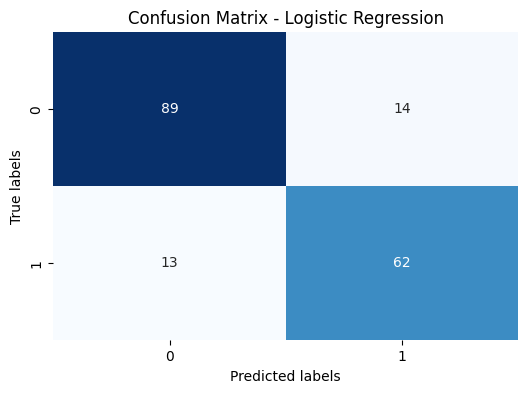


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       103
           1       0.82      0.83      0.82        75

    accuracy                           0.85       178
   macro avg       0.84      0.85      0.84       178
weighted avg       0.85      0.85      0.85       178

SVM Accuracy: 0.848314606741573


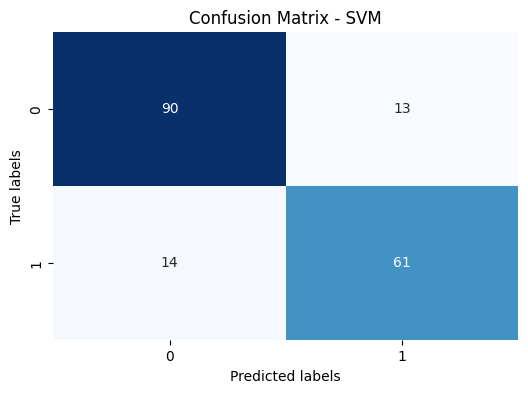


Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       103
           1       0.82      0.81      0.82        75

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178

Random Forest Accuracy: 0.8426966292134831


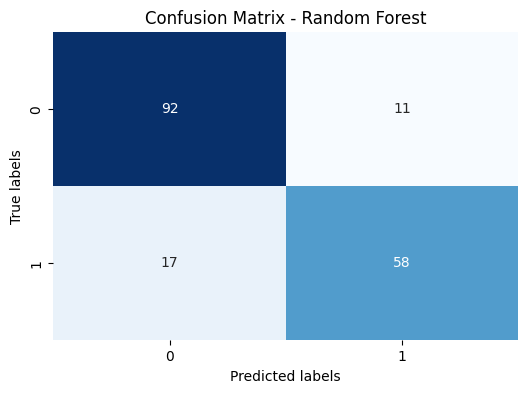


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       103
           1       0.84      0.77      0.81        75

    accuracy                           0.84       178
   macro avg       0.84      0.83      0.84       178
weighted avg       0.84      0.84      0.84       178

Gradient Boosting Accuracy: 0.8426966292134831


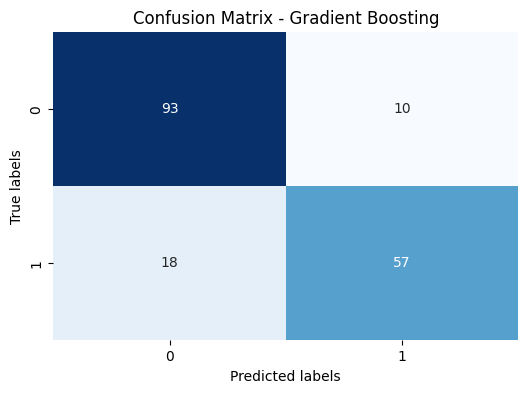


Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       103
           1       0.85      0.76      0.80        75

    accuracy                           0.84       178
   macro avg       0.84      0.83      0.84       178
weighted avg       0.84      0.84      0.84       178

KNN Accuracy: 0.8146067415730337


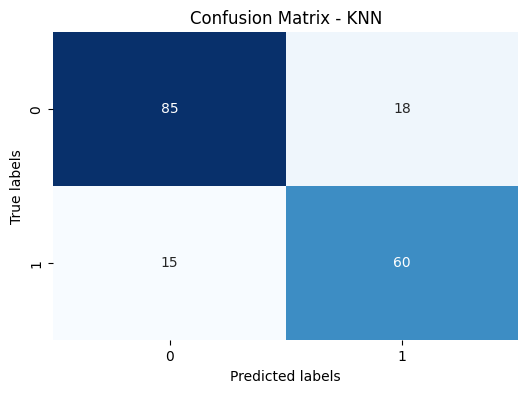


Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       103
           1       0.77      0.80      0.78        75

    accuracy                           0.81       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



In [ ]:
# Training and evaluation
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Classification report
    print(f"\nClassification Report - {name}:")
    print(classification_report(y_test, y_pred))


## Split Each ML in diffrant cell  

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create and train the model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Make predictions
logreg_preds = logreg_model.predict(X_test)

# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, logreg_preds)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")


Logistic Regression Accuracy: 0.8483


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create Grid Search CV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use best model for predictions
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Evaluate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Improved Logistic Regression Accuracy: {accuracy_best:.4f}")


Best Hyperparameters: {'C': 1}
Improved Logistic Regression Accuracy: 0.8483


 ### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Create and train the model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
svm_preds = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_accuracy:.4f}")


SVM Accuracy: 0.8483


 ## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.8427


##  Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
gb_preds = gb_model.predict(X_test)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, gb_preds)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")


Gradient Boosting Accuracy: 0.8427


##  K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions
knn_preds = knn_model.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_preds)
print(f"KNN Accuracy: {knn_accuracy:.4f}")


KNN Accuracy: 0.8146


### Decision Tree

Decision Tree Accuracy: 0.7978

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       103
           1       0.77      0.73      0.75        75

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



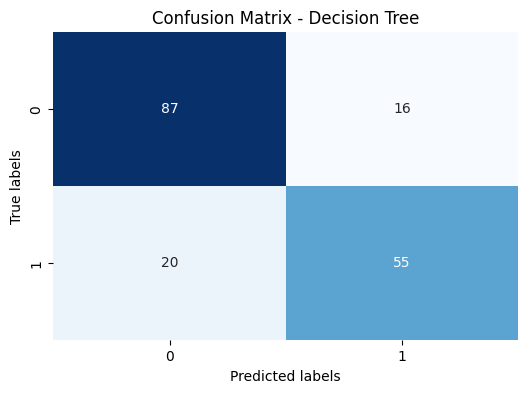

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
dt_preds = dt_model.predict(X_test)

# Accuracy
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Classification Report
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, dt_preds))

# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


### Naive Bayes

Naive Bayes Accuracy: 0.8202

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       103
           1       0.77      0.81      0.79        75

    accuracy                           0.82       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.82      0.82      0.82       178



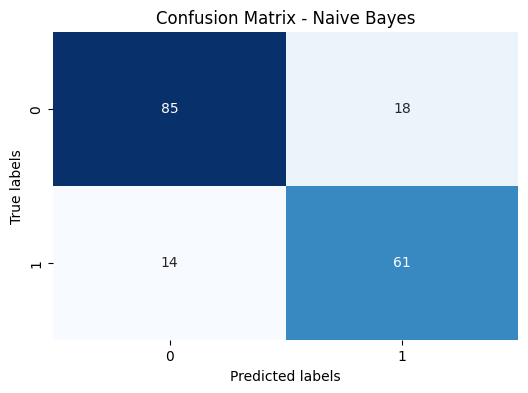

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
nb_preds = nb_model.predict(X_test)

# Accuracy
nb_accuracy = accuracy_score(y_test, nb_preds)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

# Classification Report
print("\nClassification Report - Naive Bayes:")
print(classification_report(y_test, nb_preds))

# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


###  From all these models => Best Model: Logistic Regression